In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import sklearn.linear_model as lm
import scipy

In [2]:
# Załadowanie danych 
# Źródło: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
data = pd.read_csv('C:\\Users\\mroso\\Desktop\\Bootcamp Sages\\Zjazd7\\Regresja\\train.csv')
data_train = data.iloc[:1000,:]
data_test = data.iloc[1000:,:]

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Text(0, 0.5, 'SalePrice')

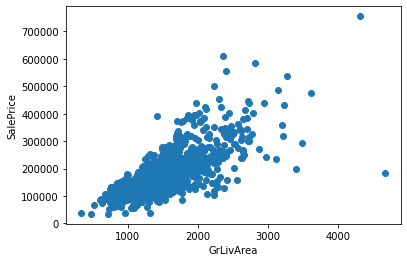

In [4]:
# Przykładowe wykresy zależności ceny od innych cech
plt.plot(data_train['GrLivArea'],data_train['SalePrice'],'o')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

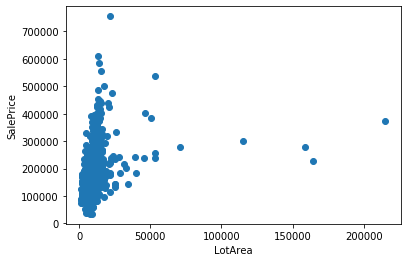

In [5]:
plt.plot(data_train['LotArea'],data_train['SalePrice'],'o')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

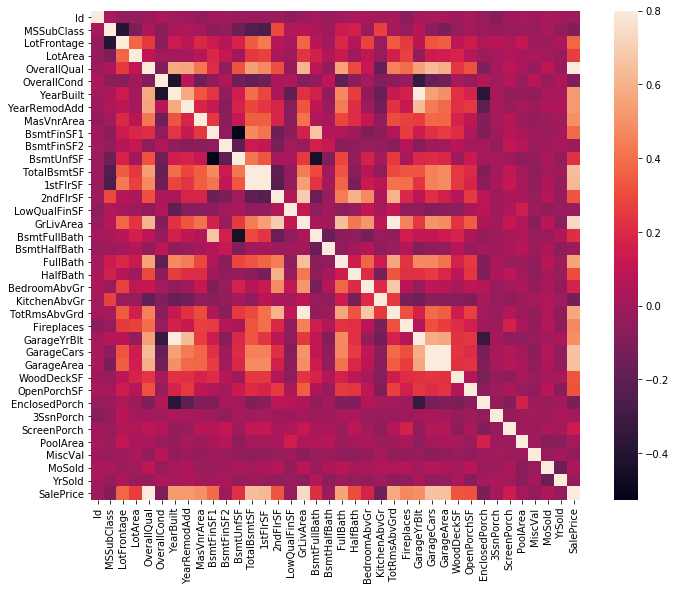

In [6]:
#Wykres macierzu koreclacji 
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# Heatmapa 10 cech najbardziej skorelowanych z ceną
k = 11 # 11 bo to uwzględnia też samą cenę 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# Pairplot 10 najbardziej skorelowanych z ceną cech
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [ ]:
# Wybranie wyłącznie tych 10 cech
final_data = data_train[cols]
final_data = final_data.fillna(0)
np.any(final_data.isnull())

Uzupełnij kod, tak aby otrzymać parametry modelu

In [ ]:
x = ... # zmienna objaśniająca
y = ...  # zmienna objaśniana
M1 = np.column_stack( ... ) 
p1 = np.linalg.lstsq(M1, y, rcond=None) # least-squares solution to a linear matrix equation

Napisz funkcję, która będzie obliczała wartość ceny mieszkania na postawie wyliczonych parametrów

In [ ]:
f_lr_1 = lambda x: ...

Oblicz przewidziane wartości i sporządź wykres y_pred od y z uwzględniem prostej f(x)=x

Sporządź wykres błędu predykcji od wartości dopasowanych

In [ ]:
# transform training data & save lambda value 
from scipy.stats import norm
y1, fitted_lambda = stats.boxcox(y)
  
# creating axes to draw plots 
fig, ax = plt.subplots(1, 2, figsize=[10,5]) 
  
# plotting the original data(non-normal) and  
# fitted data (normal) 
sns.distplot(y, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            color ="green", ax = ax[0],fit = norm) 
  
sns.distplot(y1, hist = False, kde = True, 
            kde_kws = {'shade': True, 'linewidth': 2},  
            color ="green", ax = ax[1], fit = norm) 


Oblicz współczynniki dla modelu regresji wartości y1 oraz utwórz funkcję, która będzie wyliczała wartość y1 przy użyciu wyliczonch parametrów.

In [ ]:
p2 = ...

In [ ]:
f_lr_2 = lambda x: ...

Oblicz przewidziane wartości i sporządź wykres y_pred1 od y1 z uwzględniem prostej f(x)=x

In [ ]:
y_pred1 = ...


Dokonujemy odwrotnej transformaty, aby otrzymac wartości cen w $

In [ ]:
y_pred1 = scipy.special.inv_boxcox(y_pred1,fitted_lambda)

Sporządź wykres y_pred1 od y1 z uwzględniem prostej f(x)=x

Sporządź wykres błędu predykcji od wartości dopasowanych

Policz błędy dla obu modeli:

- Mean Absolute Eroor
- Mean Squared Error
- Median Absolute Error

In [ ]:
from sklearn import  metrics
print("Mean absolute errors model 1: {}".format(metrics.mean_absolute_error(y, y_pred)))
print("Mean absolute errors model 2: {}".format(metrics.mean_absolute_error(y, y_pred1)))
print("Mean squared error model 1: {}".format( metrics.mean_squared_error(y, y_pred) ))
print("Mean squared error model 2: {}".format( metrics.mean_squared_error(y, y_pred1) ))
print("Median absolute error model 1: {}".format( metrics.median_absolute_error(y, y_pred) ))
print("Median absolute error model 2: {}".format( metrics.median_absolute_error(y, y_pred1) ))

In [ ]:
final_data_test = data_test[cols]
final_data_test = final_data_test.fillna(0)
np.any(final_data_test.isnull())

In [ ]:
x_test = np.array(final_data_test.iloc[:,1:])
y_test = final_data_test.iloc[:,0]

Oblicz wartości przewidziane przez model 1 dla danych testowych i sporządź wykres y_pred_test od y_test

In [ ]:
y_pred_test = ...

Oblicz wartości przewidziane przez model 2 dla danych testowych i sporządź wykres y_pred_test od y_test

In [ ]:
y_pred_test1 = 

Policz błędy dla danych testowych dla obu modeli:

- Mean Absolute Eroor
- Mean Squared Error
- Median Absolute Error

In [ ]:
print("Mean absolute errors model 1: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean absolute errors model 2: {}".format(metrics.mean_absolute_error(y_test, y_pred_test1)))
print("Mean squared error model 1: {}".format( metrics.mean_squared_error(y_test, y_pred_test) ))
print("Mean squared error model 2: {}".format( metrics.mean_squared_error(y_test, y_pred_test1) ))
print("Median absolute error model 1: {}".format( metrics.median_absolute_error(y_test, y_pred_test) ))
print("Median absolute error model 2: {}".format( metrics.median_absolute_error(y_test, y_pred_test1) ))